# Importando dados

In [ ]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
dados.head()
#Há 35 colunas ou seja 35 características, o que é algo ruim

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


# Usando um primeiro modelo como teste 

## RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(1234)

x = dados.drop(columns= ['id','diagnostico'])
y = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y) 

classificador = RandomForestClassifier(n_estimators=100) #Esse parametro define quantas arvores serao criadas
# classificador.fit(treino_x, treino_y) #gera erro pois há valores NaN
# print(classificador.score(teste_x, teste_y)) #.score clacula diretamente o score do modelo

In [ ]:
dados.isnull().sum() #Retorna o numero de celulas NaN em cada coluna

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
#como há muitos valores NaN, não vou dar dropna, vou retirar a coluna 'exame_33'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(1234)

x = dados.drop(columns= ['id','diagnostico'])
x = x.drop(columns = 'exame_33') #Retiro a coluna 'exame_33'
y = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3) 

classificador = RandomForestClassifier(n_estimators=100) #Esse parametro define quantas arvores serao criadas
classificador.fit(treino_x, treino_y) 
print("Resultado da classificação: %.2lf%%" % (classificador.score(teste_x, teste_y)*100)) #.score clacula diretamente o score do modelo

Resultado da classificação: 92.40%


# Validando se o algoritmo é bom com base em um algoritmo de baseline

In [ ]:
from sklearn.dummy import DummyClassifier
import numpy as np
np.random.seed(1234)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
print("Resultado da classificação boba: %.2lf%%" % (dummy.score(teste_x, teste_y)*100))


Resultado da classificação boba: 61.40%


# Criando visualizações

## grafico de violino
* grafico que mostra as frequencias de um determinado dado, misturando histograma com boxplot

In [ ]:
dados_plot = pd.concat([y, x], axis = 'columns')
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [ ]:
#pd.melt cria uma nova linha para cada celula, de modo que, os rotulos das colunas viram uma nova coluna 
dados_plot = pd.melt(
    dados_plot, #dados
    id_vars = 'diagnostico', #nome da coluna que serve como indice no dataframe original
    var_name = 'exames', #nome da nova coluna com os rotulos das colunas do dataframe original
    value_name = 'valores' #nome da nova coluna com os valores das celulas do dataframe original
)

dados_plot


,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

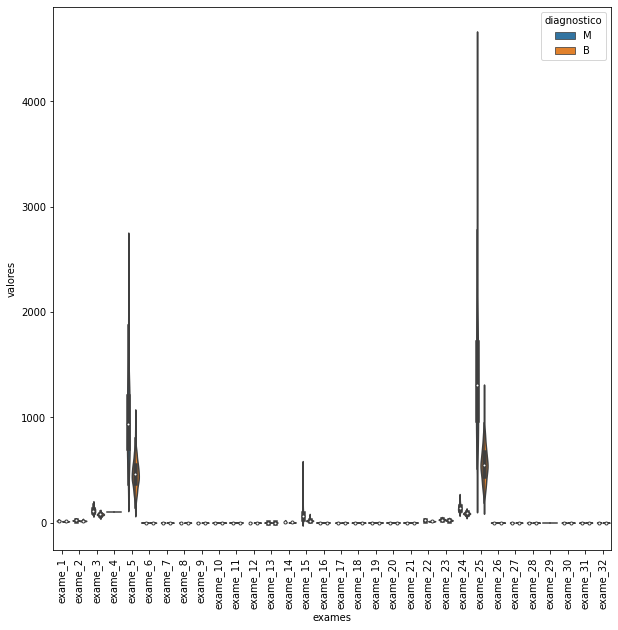

In [ ]:
#mostra as distribuições de frequencias dos dados
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.violinplot(
    x = 'exames', #valores eixo x
    y = 'valores', #valores eixo y
    data = dados_plot,
    hue = 'diagnostico' #cores binarias
)

plt.xticks(rotation = 90) #rodando os rotulos do eixo x em 90 graus

In [ ]:
#os dados possuem valores muito discrepantes, por isso, vou usar o escalador padrao para visualizar melhor
def cria_graf_violino(valores, inicio, fim):
  from sklearn.preprocessing import StandardScaler
  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np
  np.random.seed(1234)

  scaler = StandardScaler()
  scaler.fit(valores)
  treino_x_padrao = scaler.transform(valores) #Armazeno o df padronizado
  treino_x_padrao = pd.DataFrame(treino_x_padrao, columns = valores.keys())


  #Fazendo grafico violino dos 10 primeiros exames
  dados_plot = pd.concat([y, treino_x_padrao.iloc[:,inicio:fim]], axis = 'columns')

  dados_plot = pd.melt(
      dados_plot, 
      id_vars = 'diagnostico', 
      var_name = 'exames', 
      value_name = 'valores' 
  )

  plt.figure(figsize = (15,15))
  sns.violinplot(
      x = 'exames', 
      y = 'valores',
      data = dados_plot,
      hue = 'diagnostico',
      split = True #divide em 2 lados o grafico
  )

  plt.xticks(rotation = 90) 

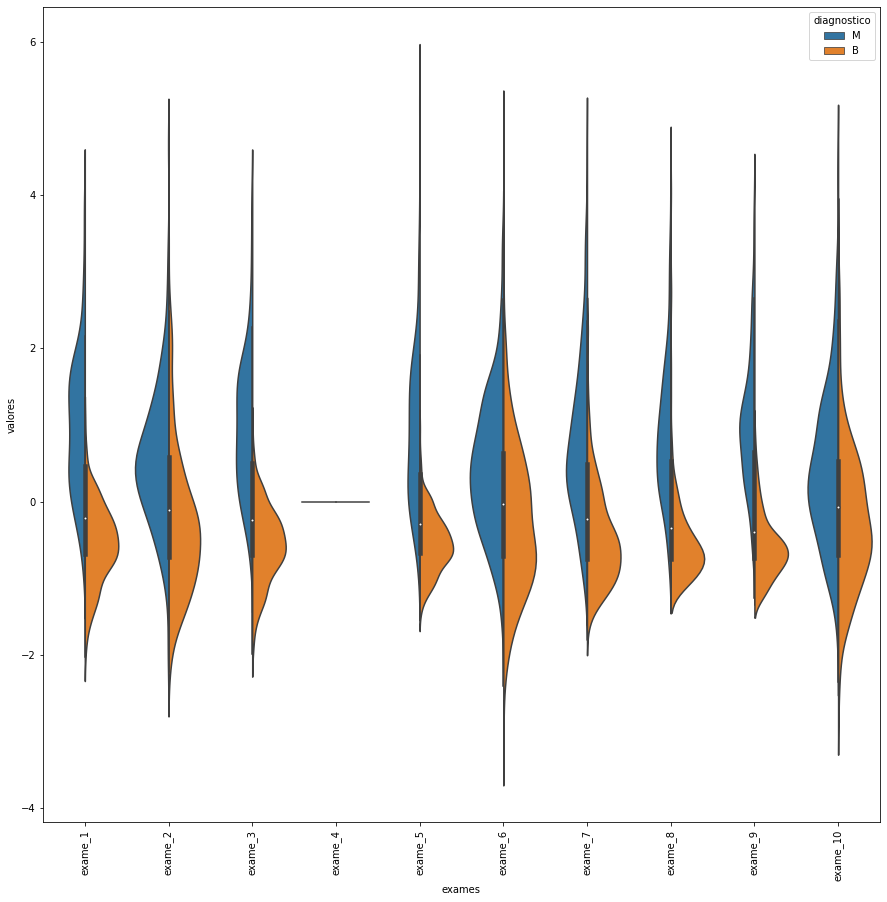

In [ ]:
#Grafico de violino do exame_1 ao exame_10
cria_graf_violino(x, 0 ,10)

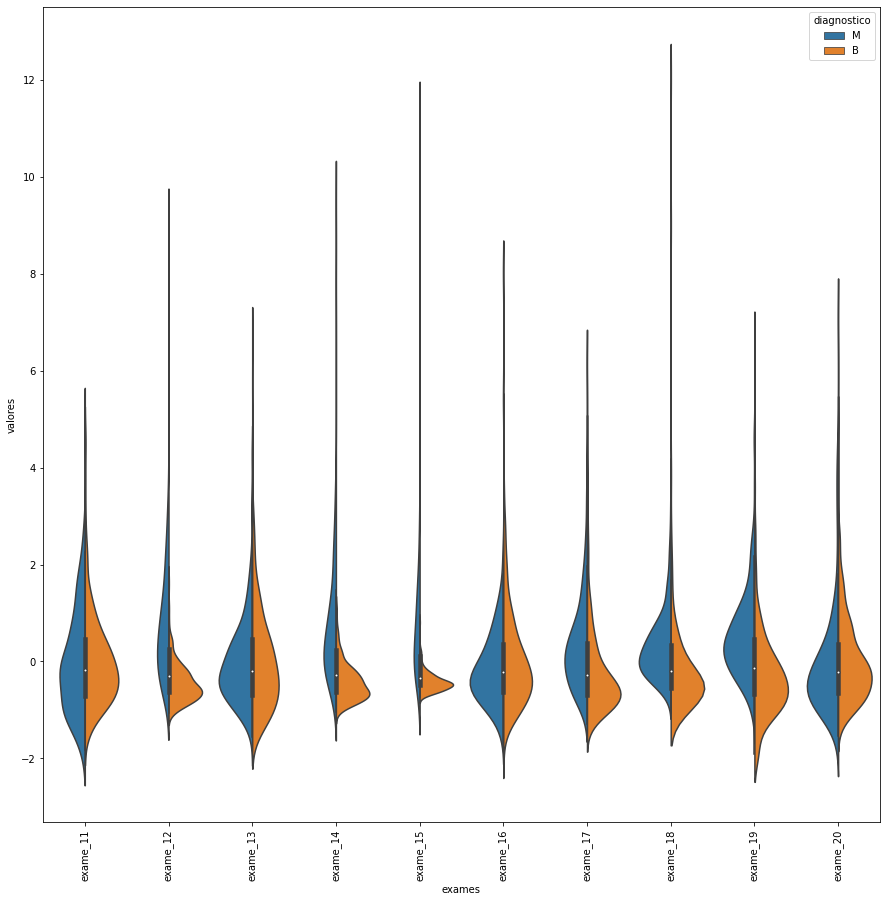

In [ ]:
#Grafico de violino do exame_11 ao exame_20
cria_graf_violino(x, 10 ,20)

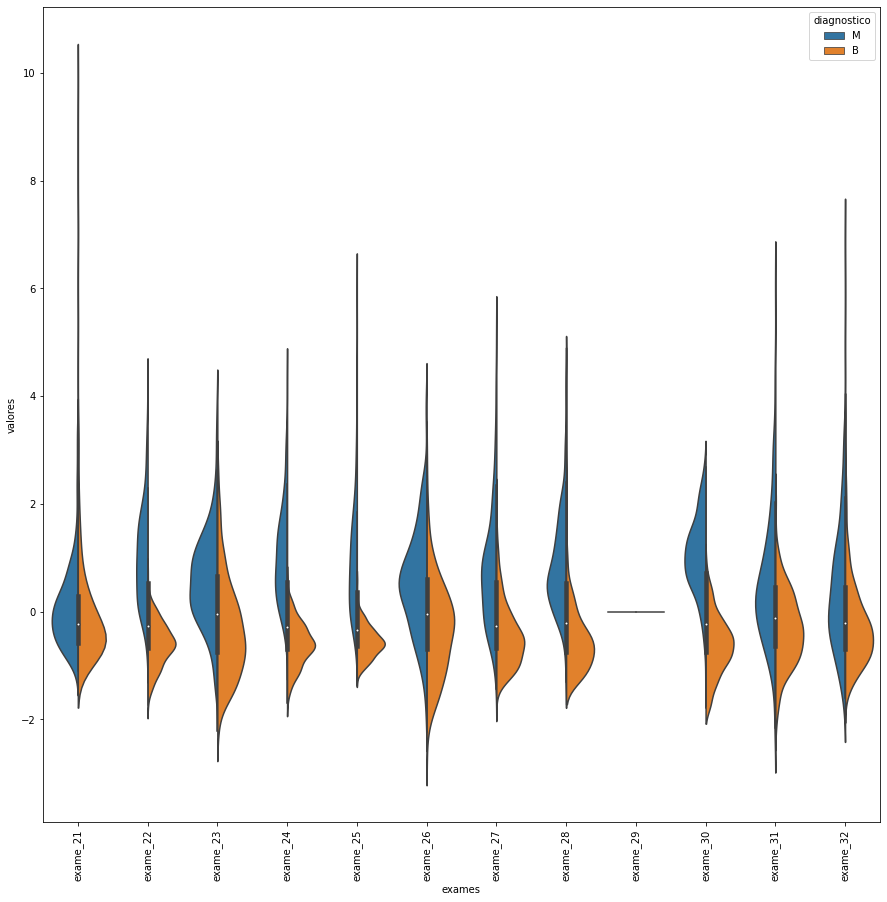

In [ ]:
#Grafico de violino do exame_21 ao exame_32
cria_graf_violino(x, 20 ,32)

In [ ]:
#As cristas das ondas indicam os valores mais comuns tanto para o tipo benigno, quanto maligno
#bizu: Quanto mais distantes as cristas das ondas de benigno e maligno, mais distintos são os dados, logo são bons para fazer a classificação

In [ ]:
#exames_4 e exames_29 são variáveis constantens, ou seja, todos os valores são iguais, logo não importam para a classificação
#Posso excluir exames_4 e exames_29
print(x.exame_4.unique())
print(x.exame_29.unique())

[103.78]
[0.786]


In [ ]:
x = x.drop(columns=['exame_4','exame_29'])

In [ ]:
def calcula_acc_forest(x):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  import numpy as np
  np.random.seed(1234)


  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3) 

  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y) 
  print("Resultado da classificação: %.2lf%%" % (classificador.score(teste_x, teste_y)*100))

calcula_acc_forest(x)

Resultado da classificação: 92.98%


In [ ]:
#o metodo .corr() cria uma matriz de correlação
x.corr().head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


# Criando heatmap com a matriz de correlação

## Matriz decorrelação
* Retorna o quão relacionadas são as variáveis do dataframe
* Valores proximos de 1 são bastante relacionados e valores proximos de 0 são pouco relacionados

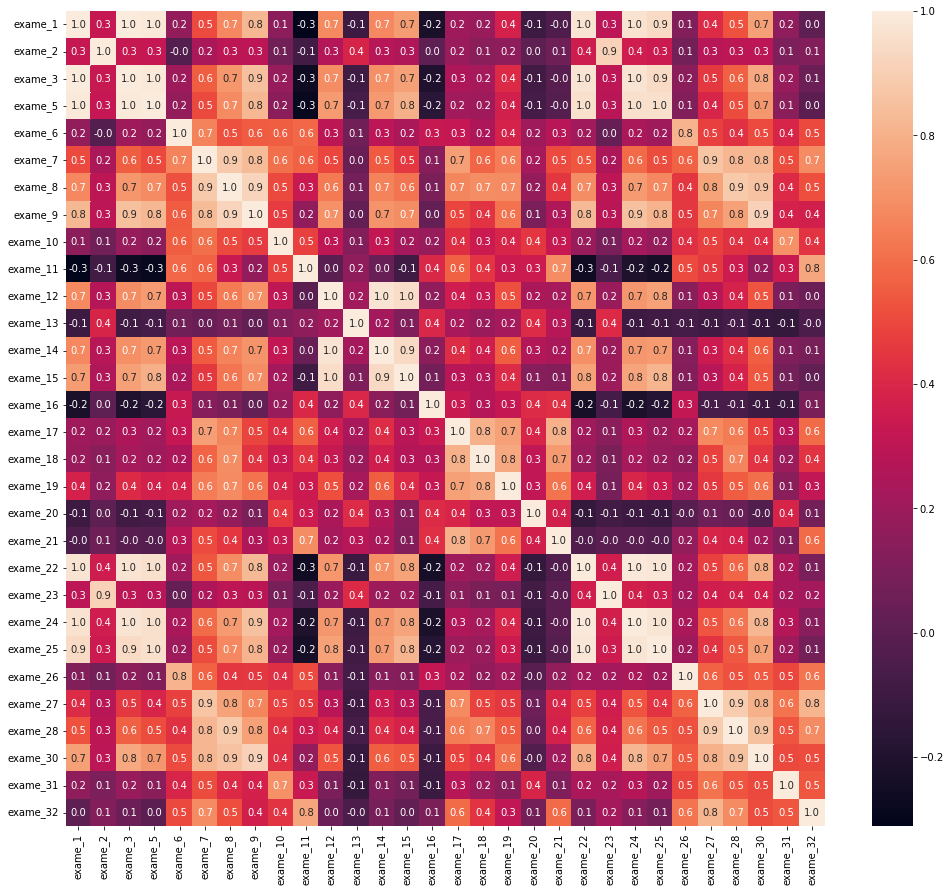

In [ ]:
matriz=x.corr()
plt.figure(figsize = (17,15))
sns.heatmap(
              matriz,
              annot = True,#coloca os valores nos quadradinhos
              fmt = '.1f' #aproxima com uma casa decimal
            )

In [ ]:
#Interpretando a matriz:
#Os valores brancos são os valores totalmente relacionados

In [ ]:
#Fazendo a seleção das variáveis que se realacionam bastante
matriz_v1 = matriz[matriz>0.99] #buscando celulas com correlção maio que 0.99
matriz_v1.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Variáveis iguais a 1 são padrão, já variáveis maiores que 1 tem alta taxa de correlação 
#A matriz de correlação é simetrica em relação a diagonal principal, logo a soma das linhas é igual a soma das colunas (n faz diferença)
matriz_v1.sum()

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
#As variáveis abaixo tem alta relação com outras variáveis
alta_relacao =  matriz_v1.sum()[matriz_v1.sum()>1]
alta_relacao

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
#Agora vou retirar todas as variáveis que possuem alta relação do dataframe
#OBS: Variáveis que se relacionam muito, podem ser ruins para meu modelo, pois o modelo entende como informação duplicada
x_sem_alta_relacao = x.drop(columns = alta_relacao.keys())
x_sem_alta_relacao

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
calcula_acc_forest(x_sem_alta_relacao)
#O resultado do teste foi inferior, pois exclui variáveis demais

Resultado da classificação: 91.81%


In [ ]:
#exame_1 e exame_3 tem os mesmos valores na soma da matriz, logo devo escolher 1 para retirar
#exame_22 e exame_24 tem os mesmos valores na soma da matriz, logo devo escolher 1 para retirar

#Se eu comparar exame_1 com exame_3 no violino, percebe-se que ambos são parecidos, logo n importa quem sai
#Se eu comparar exame_22 com exame_24 no violino, percebe-se que ambos são parecidos, logo n importa quem sai

x = x.drop(['exame_3','exame_24'], axis = 'columns')

In [ ]:
calcula_acc_forest(x)

Resultado da classificação: 92.98%


##PERIGO
exame_1 e exame_3 são dados correlacionados, porém exame_1 não necessariamente é causa de exame_3 e vice versa,
ou seja, correlação de 2 ou mais dados não tem nada a ver com a relação de causalidade.
* Ex: Se os EUA investem em ciencia, espaço e tecnologia, os casos de suicidio por estrangulamento aumetam (correlação de 99,79%) é apenas uma correlação e não uma causalidade
* **BIZU**: quanto mais alta a correlação entre as variáveis tem-se informação duplicada, o que pode contribuir mais com viés no modelo de classificação.

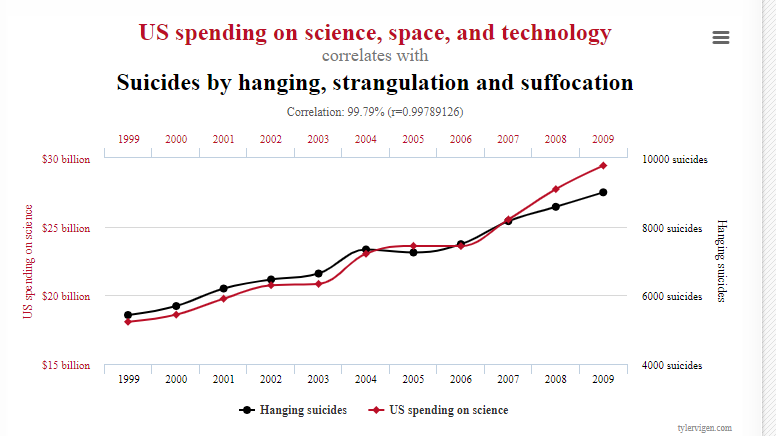

# Select Kbest
retorna um score de cada variável (feature) do dataframe, para saber qual teve maior peso e pontuação na hora da escolha<br>
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>Documentação</a>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #A função chi2 gera a pontuação para cada feature (variável)
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1234)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3)

selecionar_kmelhores = SelectKBest(chi2, k = 5) #uso a função chi2 e k =5, ou seja, apenas as 5 melhores features das 33 são selecionadas
selecionar_kmelhores.fit(treino_x, treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x) #Retorna apenas as 5 melhores features (variáveis/colunas/exames) para treino
teste_kbest = selecionar_kmelhores.transform(teste_x) #Retorna apenas as 5 melhores features (variáveis/colunas/exames) para teste

In [ ]:
treino_kbest.shape
#Apenas 5 exames são escolhidos (os melhores/mais efetivos para a classificação)

(398, 5)

In [ ]:
import numpy as np
np.random.seed(1234)
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação: %.2lf%%" % (classificador.score(teste_kbest, teste_y)*100))

#De fato o resultado para 5 exames é inferior ao resultado para mais de 30 exames, porem a diferença é minúscula

Resultado da classificação: 92.40%


# Matriz de confusão

In [ ]:

from sklearn.metrics import confusion_matrix

predict = classificador.predict(teste_kbest)
matriz_confusao = confusion_matrix(teste_y, predict) #teste_y é o valor real e predict é o valor previsto
matriz_confusao 

array([[100,   5],
       [  8,  58]])

[Text(33.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predição')]

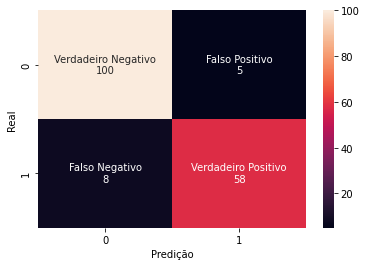

In [ ]:
labels =['Verdadeiro Negativo', 'Falso Positivo', 
         'Falso Negativo', 'Verdadeiro Positivo'] 
quadradinho = np.array([f'{a}\n{b}' for a,b in zip(labels, matriz_confusao.flatten())])
quadradinho = quadradinho.reshape([2,2])

sns.heatmap(
              matriz_confusao,
              annot = quadradinho.reshape([2,2]),
              fmt = '' #os quadradinhos tem apenas valores stings          
            ).set(xlabel ='Predição', ylabel = 'Real')

# RFE
* **Recursive Feature Elimination**
* Pontua cada coluna/variável/feature do DataFrame com um score de acordo com a importancia dessa feature para a classificação
*A feature de menos score é deletada e o processo continua ate sobrar k features (selectKbest funciona com esse algoritmo)<br><br>
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html'>Documentação</a>

Resultado da classificação: 90.06%


[Text(33.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predição')]

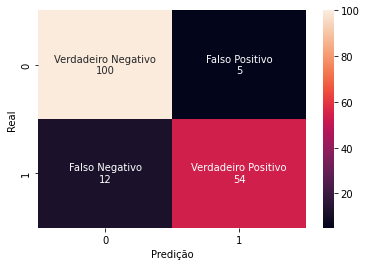

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(1234)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3)



classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

seleciondor_rfe = RFE(
                      estimator = classificador,#Estimado instanciado e treinado
                      n_features_to_select= 5, #Numero k melhores features/colunas/variáveis ao final
                      step = 1 #numero de passos que quero fazer
                    ) 

seleciondor_rfe.fit(treino_x, treino_y) #treino o RFE com meus dados
treino_rfe = seleciondor_rfe.transform(treino_x) #transformo os dados de treino
teste_rfe = seleciondor_rfe.transform(teste_x) #transformo os dados de teste

classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação: %.2lf%%" % (classificador.score(teste_rfe, teste_y)*100))

predict = classificador.predict(teste_rfe)
matriz_confusao = confusion_matrix(teste_y, predict) #teste_y é o valor real e predict é o valor previsto
matriz_confusao 

labels =['Verdadeiro Negativo', 'Falso Positivo', 
         'Falso Negativo', 'Verdadeiro Positivo'] 
quadradinho = np.array([f'{a}\n{b}' for a,b in zip(labels, matriz_confusao.flatten())])
quadradinho = quadradinho.reshape([2,2])

sns.heatmap(
              matriz_confusao,
              annot = quadradinho.reshape([2,2]),
              fmt = '' #os quadradinhos tem apenas valores stings          
            ).set(xlabel ='Predição', ylabel = 'Real')


#CONCLUSAO: RFE é pior que selectKbest na hora de classificar cancer maligno

Quais as diferenças entre os métodos automatizados (SelectKbest e REF) e as formas analíticas (Detecção de valores não preenchidos/NaN, valores constantes e correlacionados) utilizadas até o momento?

Os metodos automáticos de pre-prpocessamento (SelectKbest e REF) fazem toda aquela análise de Detecção de valores não preenchidos/NaN, valores constantes e correlacionados automaticamente com base num ranking

# RFECV
* Retorna quantas features usar para ter o melhor resultado possivel e quais features são essas <br>
<a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html'>Documentação</a>

Resultado da classificação: 92.98%


[Text(33.0, 0.5, 'Real'), Text(0.5, 15.0, 'Predição')]

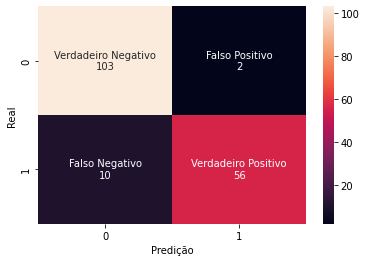

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(1234)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3,random_state=1234)



classificador = RandomForestClassifier(n_estimators=100 ,random_state=1234)
classificador.fit(treino_x, treino_y)

seleciondor_rfecv = RFECV(
                      estimator = classificador,#Estimado instanciado e treinado
                      cv = 5, #Em quantas partes vou dividir o dataframe
                      step = 1, #Numero de passos que quero fazer
                      scoring = 'accuracy' #Métrica para selecionar as melhores features
                    ) 

seleciondor_rfecv.fit(treino_x, treino_y) #treino o RFECV com meus dados
treino_rfecv = seleciondor_rfecv.transform(treino_x) #transformo os dados de treino
teste_rfecv = seleciondor_rfecv.transform(teste_x) #transformo os dados de teste

classificador.fit(treino_rfecv, treino_y)
print("Resultado da classificação: %.2lf%%" % (classificador.score(teste_rfecv, teste_y)*100))

predict = classificador.predict(teste_rfecv)
matriz_confusao = confusion_matrix(teste_y, predict) #teste_y é o valor real e predict é o valor previsto
matriz_confusao 

labels =['Verdadeiro Negativo', 'Falso Positivo', 
         'Falso Negativo', 'Verdadeiro Positivo'] 
quadradinho = np.array([f'{a}\n{b}' for a,b in zip(labels, matriz_confusao.flatten())])
quadradinho = quadradinho.reshape([2,2])

sns.heatmap(
              matriz_confusao,
              annot = quadradinho.reshape([2,2]),
              fmt = '' #os quadradinhos tem apenas valores stings          
            ).set(xlabel ='Predição', ylabel = 'Real')




In [ ]:
#Retorna quantas features o RFECV escolheu
seleciondor_rfecv.n_features_

26

In [ ]:
#Retorna True para todas as features selecionadas por RFECV
seleciondor_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
treino_x.columns[seleciondor_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
#A chave 'mean_test_score' retorna o score medio de cada feature
#A chave 'std_test_score' retorna o desvio padrao dos scores de cada feature
#Ignorar as outras metricas
seleciondor_rfecv.cv_results_

{'mean_test_score': array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
        0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
        0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
        0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
        0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
        0.96981013, 0.96231013, 0.95984177]),
 'std_test_score': array([0.02032587, 0.0249877 , 0.01657648, 0.01868574, 0.02006554,
        0.0112556 , 0.01464564, 0.02239737, 0.02150069, 0.0184514 ,
        0.02013638, 0.0137529 , 0.01466061, 0.01785842, 0.01586324,
        0.01785842, 0.01510711, 0.02042118, 0.01287341, 0.01660877,
        0.02031158, 0.02239813, 0.01466061, 0.02326102, 0.0184425 ,
        0.01722705, 0.01785842, 0.01460655]),
 'split0_test_score': array([0.85  , 0.9375, 0.925 , 0.9125, 0.9375, 0.9375, 0.9375, 0.925 ,
        0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.95  , 0.95  , 0.95  ,
        0.95  , 0.9375, 0.

In [ ]:
seleciondor_rfecv.cv_results_['mean_test_score']

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

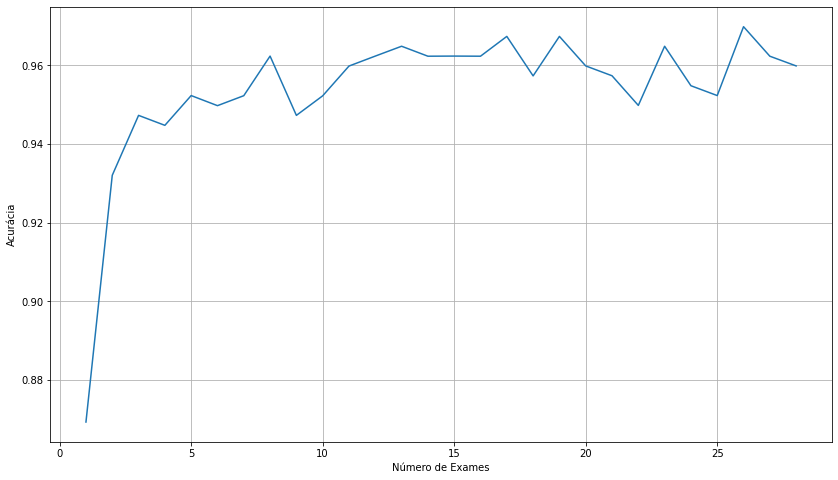

In [ ]:
#Grafico da accuracia do modelo pela quantidade de features
plt.figure(figsize=(14,8))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')
plt.grid()#coloca quadradinhos no grafico
plt.plot(
    range(1, len(seleciondor_rfecv.cv_results_['mean_test_score'])+1), #Valores em X
    seleciondor_rfecv.cv_results_['mean_test_score'] #Valores em Y
)
plt.show()


In [ ]:
#Criando um grafico de disperção apenas com as melhores features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import numpy as np
np.random.seed(1234)

treino_x, teste_y, treino_y, teste_y = train_test_split(x, y, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y) #PERIGO: Treinar o modelo é obrigatório

rfe = RFE(
    estimator = classificador,
    n_features_to_select=2,
    step = 1
)
rfe.fit(treino_x, treino_y)
dados_disp = rfe.transform(x)

In [ ]:
dados_disp

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

In [ ]:
dados_disp.shape

(569, 2)

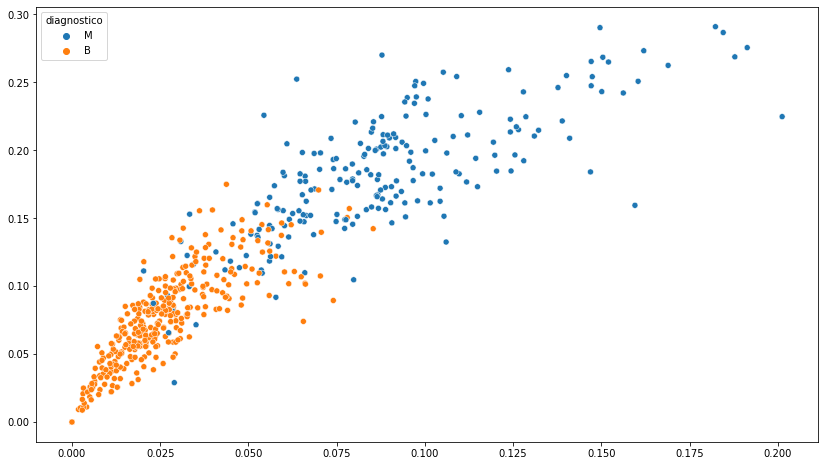

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.scatterplot(x = dados_disp[:,0] , y=dados_disp[:,1], hue=y)

#como reduzi 33 dimensoens em apenas 2, estou perdendo muita informação o que é pessimo
#Logo, o grafico abaixo é ruim

# PCA
* Tecnica para reduzir a dimensão, sem perder muita informação
* PCA funciona melhor com dados normalizados

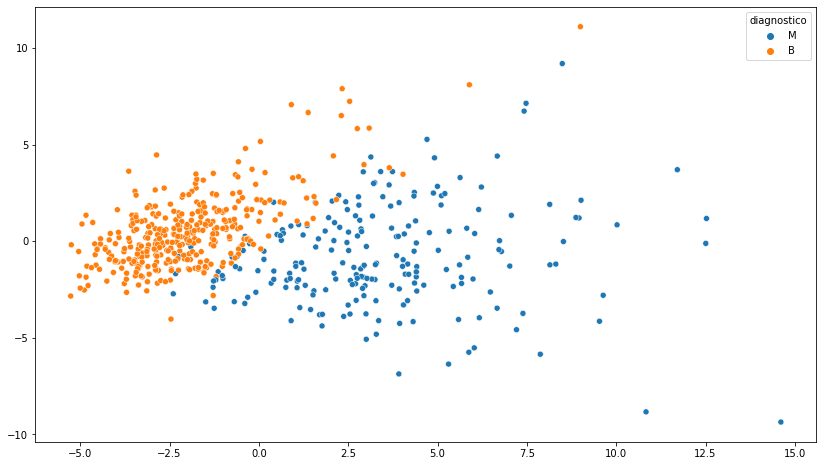

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
normalizado = scaler.fit_transform(x)

pca = PCA(n_components = 2)#numero final de features é 2
dados_pca = pca.fit_transform(normalizado) #Treina e transforma os dados
plt.figure(figsize=(14,8))
sns.scatterplot(x = dados_pca[:,0] , y=dados_pca[:,1], hue=y)


# TSNE
* Pega as distancias em altas dimensões (EX: 28 dimençõoes) e mantem a proporção em distancias menores (Ex: 2 dimenções) facilitando a visualização
* Um pouco melhor que o PCA

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


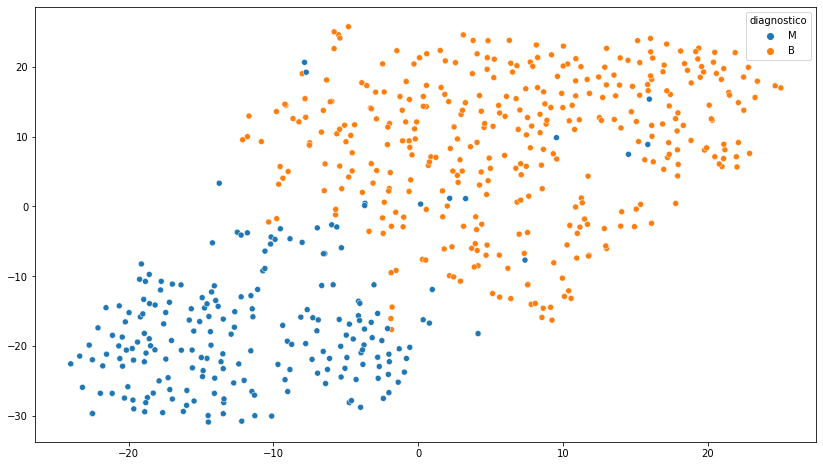

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
normalizado = scaler.fit_transform(x)

tsne = TSNE(n_components = 2)#numero final de features é 2
dados_tsne = tsne.fit_transform(normalizado) #Treina e transforma os dados
plt.figure(figsize=(14,8))
sns.scatterplot(x = dados_tsne[:,0] , y=dados_tsne[:,1], hue=y)


# Feature Selection x Redução de Dimensionalidade
* feature selecetion (SelectKbest e RFE) funciona como um filtro, ou seja, filtra apenas as principais features
* redução de dimensionalidade preserva o maior número possível de informação em uma dimensão reduzida, como PCA e T-SNE.

## Por que utilizar os métodos de seleção de feature (SelectKbest e RFE) para gerar uma visualização dos dados no plano é inadequada?

Ao se utilizar as técnicas de seleção de feature para gerar uma visualização no plano, é preciso escolher duas features para representar os dados. Manter apenas dois das diversas features faz com que um grande número de informação seja perdida, resultando em visualizações que podem induzir à conclusões equivocadas. Assim, para gerar uma visualização no plano, o ideal é utilizar técnicas que tentam preservar o maior número possível de informação em uma dimensão reduzida, como PCA e T-SNE.